In [79]:
import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [47]:
## Plot number of sessions / month

d = []
for language in ['pl','si','bg']:
    list_mtd = [x for x in gb(f"/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/data/original/{language}/{language}-txt/*") if "meta" in x and "2020" in x]
    for day in list_mtd:
        sum_day = pd.read_csv(day,sep='\t')['WORDS'].sum()
        date = dt.datetime.strptime(day.split('_')[1][:10],"%Y-%m-%d")
        d.append([language,sum_day,date])
df = pd.DataFrame(d)
df.columns = ['language','words_day','day']

In [58]:
def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar


def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='summer')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    ax.figure.colorbar(im)

def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')

    ax.set(xticks=np.arange(7), 
           xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
    ax.xaxis.tick_top()

def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in uniq_months]
    labels = [month_labels[m - 1] for m in uniq_months]
    ax.set(yticks=yticks)
    ax.set_yticklabels(labels, rotation=90)

def main(df,language):
    df = df[df['language'] == language]
    dates, data = df['day'], df['words_day']
    p = calendar_heatmap(ax, dates, data)
    plt.show()

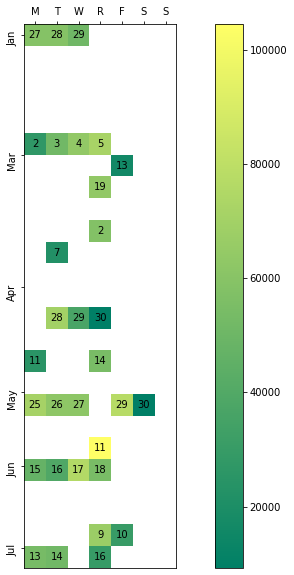

In [59]:
fig, ax = plt.subplots(figsize=(14, 10))

for l in ['si','bg','pl']:
    main(df,l)

In [101]:
## Plot number of words / month

d = []
for language in ['pl','si','bg','hr']:
    list_mtd = [x for x in gb(f"/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/data/original/{language}/{language}-txt/*") if "meta" in x and "2020" in x]

    
    for m in "2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08".split(' '):
        sum_month = 0
        for f in [x for x in list_mtd if m in x]:
            sum_month += pd.read_csv(f,sep='\t')['WORDS'].sum()
        #m = dt.datetime.strptime(m,"%Y-%m")
        d.append([language,sum_month,m])
df = pd.DataFrame(d)
df.columns = ['language','words_m','m']

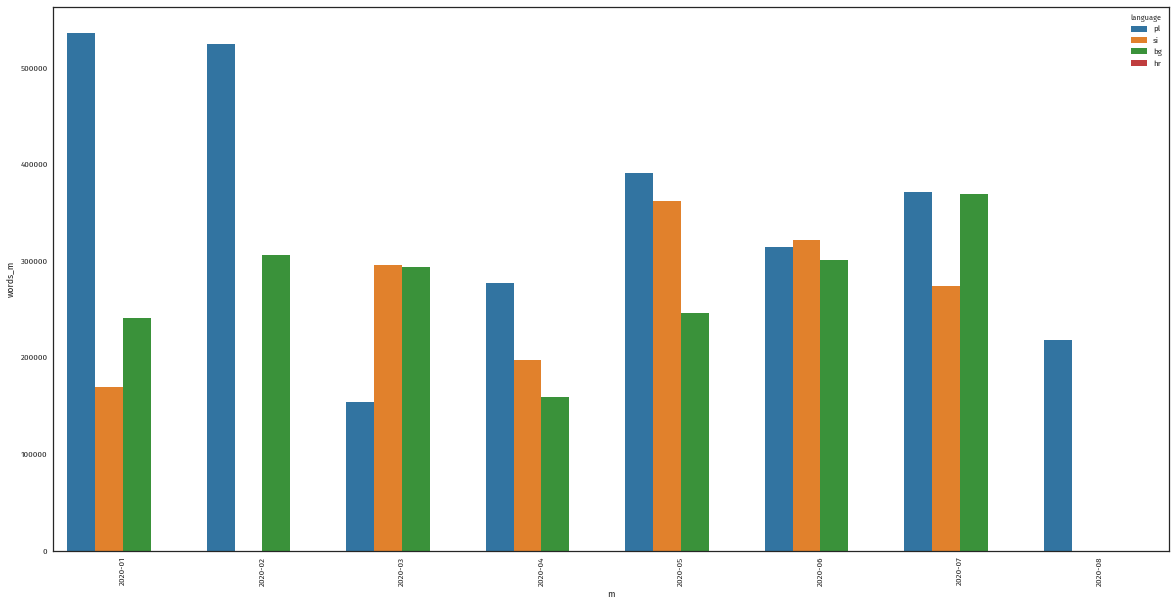

In [102]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Fira Sans")

fig = plt.figure(figsize=(20,10))

p = sns.barplot(x="m", y="words_m", hue='language', data=df)

for label in p.get_xticklabels():
    label.set_rotation(90) 

In [94]:
## Plot number of words / month / table

d = []
for language in ['pl','si','bg']:
    list_mtd = [x for x in gb(f"/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/data/original/{language}/{language}-txt/*") if "meta" in x and "2020" in x]

    
    for m in "2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08".split(' '):
        sum_month = 0
        number_month = len([x for x in list_mtd if m in x])
        for f in [x for x in list_mtd if m in x]:
            sum_month += pd.read_csv(f,sep='\t')['WORDS'].sum()
        #m = dt.datetime.strptime(m,"%Y-%m")
        d.append([language,m,f"{sum_month:,} ({number_month})"])
df = pd.DataFrame(d)
df.columns = "l m s".split(' ')

In [100]:
df.pivot(index='l',columns='m',values='s').reset_index().to_csv('/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/word-freq-session-table.csv')